# Case study on UnSupervised learning

#### Submitted By : Shuhaib T P

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Load the dataset into python environment

In [2]:
data=pd.read_csv('Wine.csv')
data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [6]:
data.shape

(178, 13)

In [3]:
data.isnull().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

In [4]:
data.dtypes

Alcohol                 float64
Malic_Acid              float64
Ash                     float64
Ash_Alcanity            float64
Magnesium                 int64
Total_Phenols           float64
Flavanoids              float64
Nonflavanoid_Phenols    float64
Proanthocyanins         float64
Color_Intensity         float64
Hue                     float64
OD280                   float64
Proline                   int64
dtype: object

In [7]:
data.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


### Scaling 

In [8]:
from sklearn.preprocessing import StandardScaler
scaled_data = pd.DataFrame(StandardScaler().fit_transform(data) , columns=data.columns, index =data.index)
scaled_data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


## 2. Try out different clustering models in the wine dataset

### A) KMeans Clustering

In [9]:
#Importing library
from sklearn.cluster import KMeans

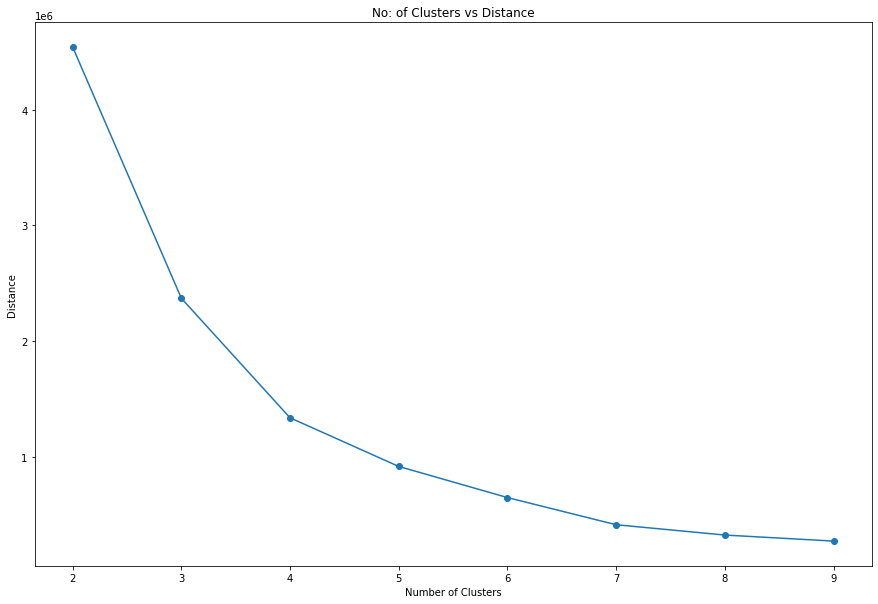

In [21]:
# Finding optimal clusters by Elbow Graph
kpoints = range(2,10)
inertias = []
for k in kpoints:
    inertias.append(KMeans(n_clusters=k, init = "k-means++", random_state=42).fit(data).inertia_)
plt.figure(figsize = (15, 10))
plt.plot(kpoints, inertias, "-o")
plt.title("No: of Clusters vs Distance")
plt.xlabel("Number of Clusters")
plt.ylabel("Distance")
plt.show()

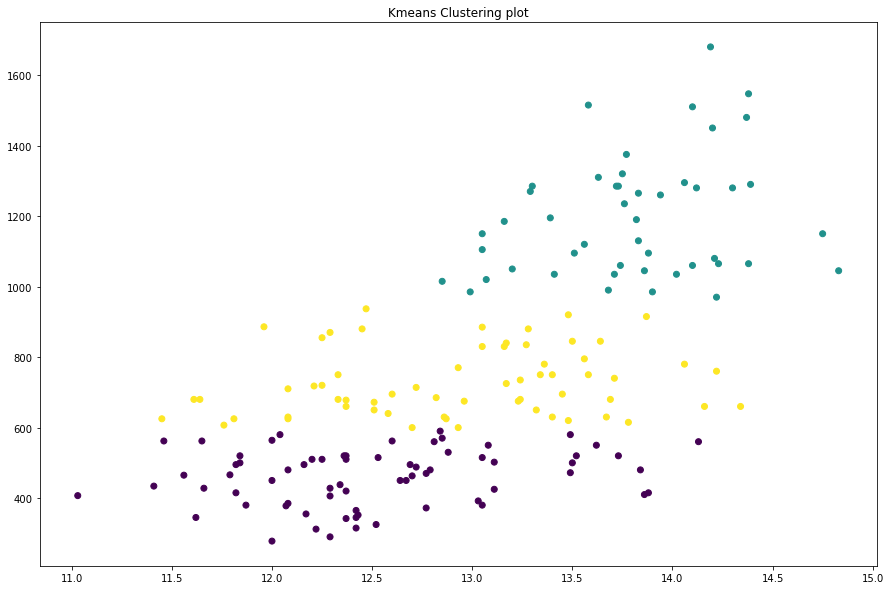

In [26]:
model_kmeans = KMeans(n_clusters=3, init = "k-means++", random_state=42)
model_kmeans.fit(data)
kmean_clusters = model_kmeans.labels_
plt.figure(figsize = (15, 10))
plt.title("Kmeans Clustering plot")
plt.scatter(data["Alcohol"], data["Proline"], c = kmean_clusters)
plt.show()

### B) Agglomerative Clustering

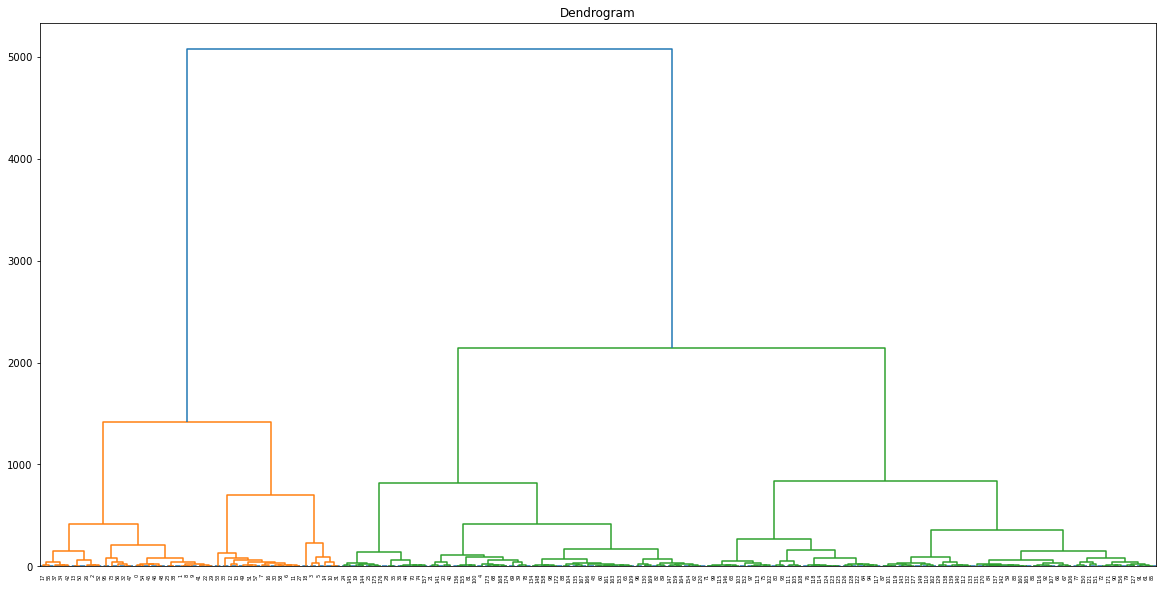

In [29]:
from scipy.cluster.hierarchy import dendrogram, linkage
plt.figure(figsize = (20, 10))
plt.title("Dendrogram")
plt.hlines(0.2, 0, 5000, linestyles="dashed")
dend = dendrogram(linkage(data, method = "ward"))

From above figure it is clear that there is 3 clusters

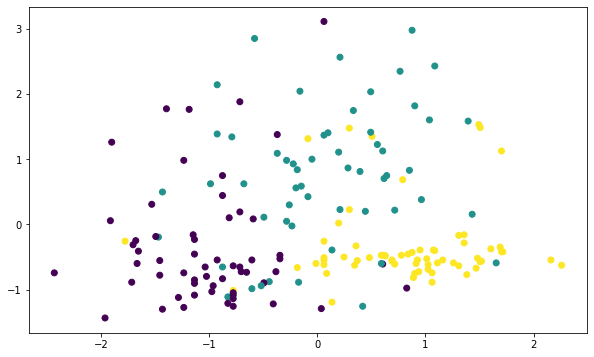

In [39]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 3 , affinity = "euclidean" , linkage = "ward")
model_hc = hc.fit(scaled_data)
HC_clusters = model_hc.labels_

plt.figure(figsize = (10, 6))
plt.scatter(scaled_data.iloc[:,0],scaled_data.iloc[:,1],c=HC_clusters)

### C) KMeans Clustering with PCA

In [40]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(scaled_data)
pca.transform(scaled_data)
pca.components_

array([[ 0.1443294 , -0.24518758, -0.00205106, -0.23932041,  0.14199204,
         0.39466085,  0.4229343 , -0.2985331 ,  0.31342949, -0.0886167 ,
         0.29671456,  0.37616741,  0.28675223],
       [-0.48365155, -0.22493093, -0.31606881,  0.0105905 , -0.299634  ,
        -0.06503951,  0.00335981, -0.02877949, -0.03930172, -0.52999567,
         0.27923515,  0.16449619, -0.36490283],
       [-0.20738262,  0.08901289,  0.6262239 ,  0.61208035,  0.13075693,
         0.14617896,  0.1506819 ,  0.17036816,  0.14945431, -0.13730621,
         0.08522192,  0.16600459, -0.12674592],
       [-0.0178563 ,  0.53689028, -0.21417556,  0.06085941, -0.35179658,
         0.19806835,  0.15229479, -0.20330102,  0.39905653,  0.06592568,
        -0.42777141,  0.18412074, -0.23207086],
       [-0.26566365,  0.03521363, -0.14302547,  0.06610294,  0.72704851,
        -0.14931841, -0.10902584, -0.50070298,  0.13685982, -0.07643678,
        -0.17361452, -0.10116099, -0.1578688 ],
       [-0.21353865, -0.536813

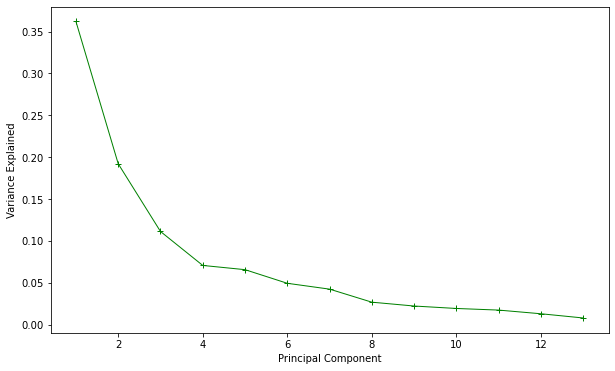

In [46]:
PC_values = np.arange(pca.n_components_) + 1
plt.figure(figsize = (10, 6))
plt.plot(PC_values, pca.explained_variance_ratio_, '+-', linewidth=1, color='green')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

In [47]:
pca = PCA(n_components=8)
pca.fit(scaled_data)
pca_data = pca.transform(scaled_data)

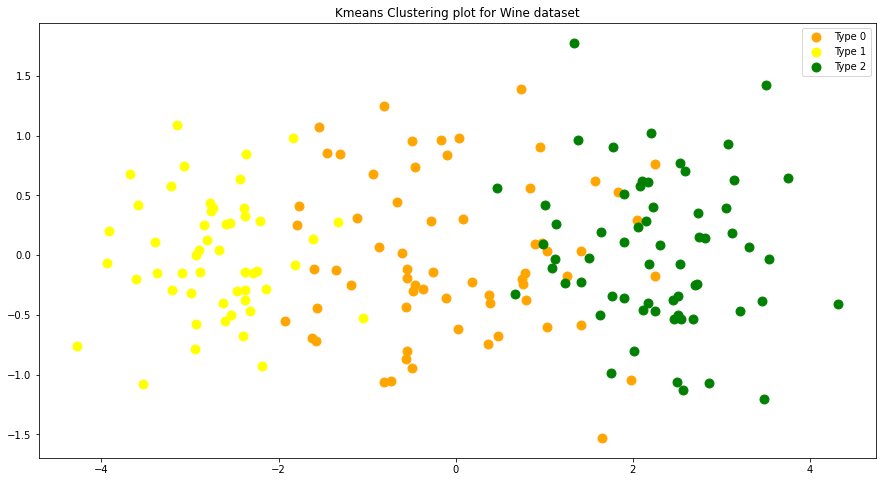

In [49]:
kmeans = KMeans(n_clusters = 3 , init ="k-means++",max_iter = 1000 ,random_state=42)
kmeans.fit(pca_data)
kmean_clusters = kmeans.labels_
plt.figure(figsize=(15,8))
plt.scatter(pca_data[kmean_clusters == 0, 0], pca_data[kmean_clusters == 0, 7], s = 80, c = 'orange', label = 'Type 0')
plt.scatter(pca_data[kmean_clusters == 1, 0], pca_data[kmean_clusters == 1, 7], s = 80, c = 'yellow', label = 'Type 1')
plt.scatter(pca_data[kmean_clusters == 2, 0], pca_data[kmean_clusters == 2, 7], s = 80, c = 'green', label = 'Type 2')

plt.title('Kmeans Clustering plot for Wine dataset')
plt.legend()

# The optimum Number of Clusters is 3
